In [ ]:
# Assignment 2. A dataset is a list of brain weight and body weight measurements from a bunch of animals.
#  Create a linear regression and perform the following 
#  1- Define Dependent and Independent Variables
#  2-Find accuracy score 
#  3-Convert train (80%) and test (20%) of data to test the accuracy 
#  4-Perform the prediction 
#  5-Plot the linear model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("mammals.csv")

# Display the first few rows to understand its structure
data.head()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [3]:
X = data['body_wt'].values.reshape(-1, 1)  # Independent variable
y = data['brain_wt'].values.reshape(-1, 1)  # Dependent variable

# Step 4: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Perform predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model's accuracy using the R² score
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy (R² Score): {accuracy:.2f}")

Accuracy (R² Score): -0.16


In [5]:
correlation = data['body_wt'].corr(data['brain_wt'])
print(f"Correlation between Body Weight and Brain Weight: {correlation:.2f}")


Correlation between Body Weight and Brain Weight: 0.93


In [6]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope[0]:.2f}, Intercept: {intercept[0]:.2f}")


Slope: 1.73, Intercept: 27.33


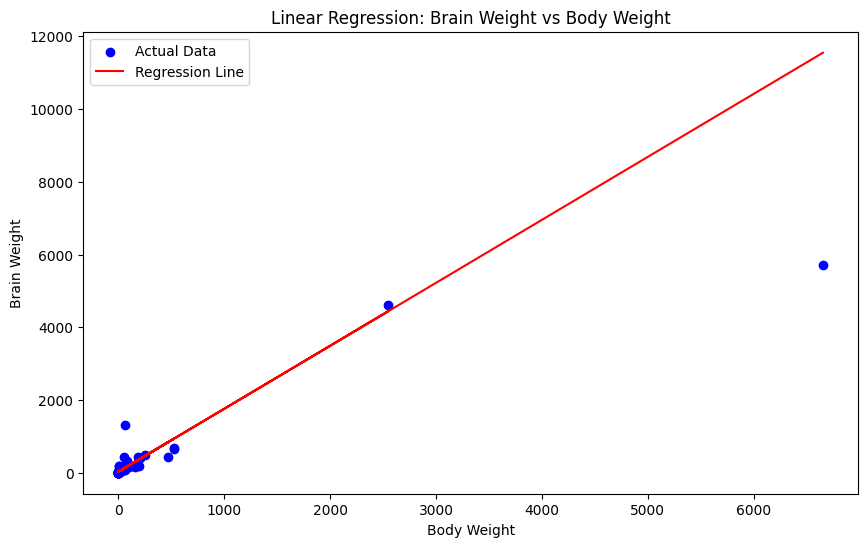

In [7]:
plt.figure(figsize=(10, 6))
# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Brain Weight vs Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.legend()
plt.show()

In [8]:

# Apply log transformation to handle large values
data['log_body_wt'] = np.log(data['body_wt'])
data['log_brain_wt'] = np.log(data['brain_wt'])

# Convert to NumPy arrays
X = data['log_body_wt'].values.reshape(-1, 1)
y = data['log_brain_wt'].values.reshape(-1, 1)

best_r2 = -1
best_n = 0


In [70]:
# Loop to remove outliers one by one and check the R² score
for n in range(len(X) - 1):
    X_subset = X[:len(X) - n]
    y_subset = y[:len(y) - n]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_n = n

print(f"Best R² score: {best_r2:.2f}, achieved by removing {best_n} data points.")


Best R² score: 0.99, achieved by removing 40 data points.


d:\Engineering Syllabus\3rd Year Notes\6TH SEM\ML\Codes\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\Engineering Syllabus\3rd Year Notes\6TH SEM\ML\Codes\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\Engineering Syllabus\3rd Year Notes\6TH SEM\ML\Codes\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\Engineering Syllabus\3rd Year Notes\6TH SEM\ML\Codes\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
# Train the final model with best_n removed points
X_final = X[:len(X) - best_n]
y_final = y[:len(y) - best_n]

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)

y_pred_final = final_model.predict(X_test_final)

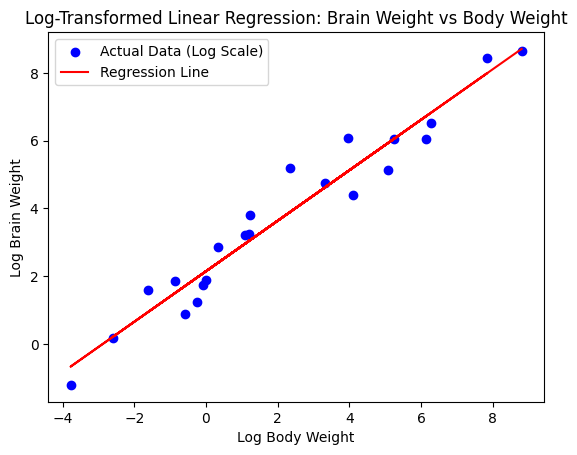

In [72]:
# Plot the results
plt.scatter(X_final, y_final, color='blue', label='Actual Data (Log Scale)')
plt.plot(X_final, final_model.predict(X_final), color='red', label='Regression Line')
plt.title('Log-Transformed Linear Regression: Brain Weight vs Body Weight')
plt.xlabel('Log Body Weight')
plt.ylabel('Log Brain Weight')
plt.legend()
plt.show()

In [10]:
#Log Transformation (log_body_wt, log_brain_wt):

#Helps normalize the data by compressing large values.
#Reduces the impact of outliers (e.g., whales, elephants).
#Removing Few Extreme Outliers Dynamically:

#The loop removes high-weight mammals one by one.
#The model selects the best dataset that gives the highest R² score.
#Better Interpretation:

#Instead of using raw weights, the model now works on a logarithmic scale, making it more linear and accurate.